In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

In [2]:
df_orig = pd.read_csv('housing.csv')
df_orig

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


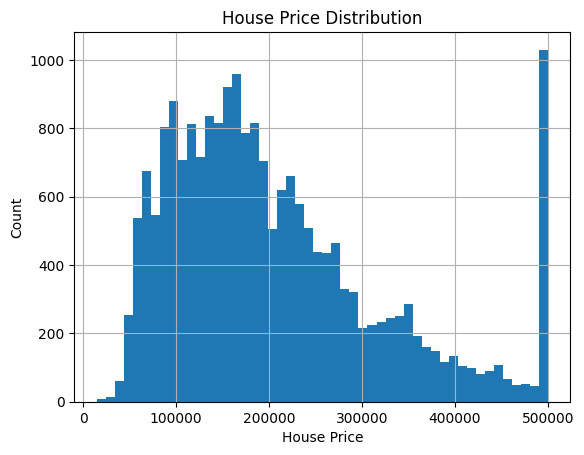

In [3]:
df_orig.median_house_value.hist(bins=50);
plt.title('House Price Distribution');
plt.xlabel('House Price');
plt.ylabel('Count');

Yes, lots of values at the right extreme.

### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

In [4]:
df_orig.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
df = df_orig[df_orig.ocean_proximity.isin(['<1H OCEAN', 'INLAND'])].copy()
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN    9136
INLAND       6551
Name: count, dtype: int64

In [6]:
df = df[
    [
        'latitude',
        'longitude',
        'housing_median_age',
        'total_rooms',
        'total_bedrooms',
        'population',
        'households',
        'median_income',
        'median_house_value'
    ]
]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Question 1

There's one feature with missing values. What is it?

In [7]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

**Answer 1**: total_bedrooms

### Question 2

What's the median (50% percentile) for variable `'population'`?

In [9]:
df.population.describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

**Answer 2**: 1195

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

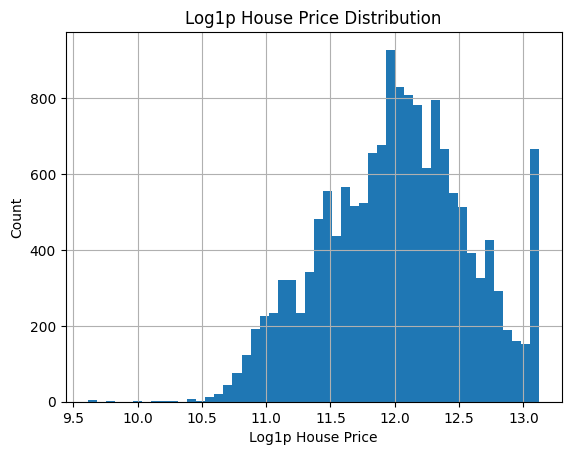

In [11]:
np.log1p(df.median_house_value).hist(bins=50);
plt.title('Log1p House Price Distribution');
plt.xlabel('Log1p House Price');
plt.ylabel('Count');

In [12]:
def train_val_test_split(df, ratio_val=0.2, ratio_test=0.2, seed=42):
    df = df.copy()
    df.median_house_value = np.log1p(df.median_house_value)
    
    idx = list(df.index) 
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    n = df.shape[0]
    n_test = round(n * ratio_test)
    n_val = round(n * ratio_val)
    n_train = n - n_test - n_val
    
    df_train = df.loc[idx[ : n_train], :]
    df_val = df.loc[idx[n_train : n_train + n_val], :]
    df_test = df.loc[idx[n_train + n_val: ], :]
    
    y_train = df_train.pop('median_house_value')
    y_val = df_val.pop('median_house_value')
    y_test = df_test.pop('median_house_value')
    return df_train, y_train, df_val, y_val, df_test, y_test

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [13]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [14]:
def rmse(y_pred, y_true):
    se = (y_pred - y_true)**2
    return np.sqrt(se.mean())

In [15]:
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(df)
mean_total_bedrooms = X_train.total_bedrooms.mean()
mean_total_bedrooms

542.552956325786

In [16]:
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(df.fillna(0))
w10, w1r = train_linear_regression(X_train, y_train)
rmse1 = rmse(w10 + X_val.dot(w1r), y_val)

In [17]:
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(df.fillna(mean_total_bedrooms))
w20, w2r = train_linear_regression(X_train, y_train)
rmse2 = rmse(w20 + X_val.dot(w2r), y_val)

In [18]:
round(rmse1, 2), round(rmse2, 2)

(0.34, 0.34)

**Answer 3**: Both are equally good

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001

In [19]:
df = df.fillna(0)
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(df)

In [20]:
def train_linear_regression_reg(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX += r * np.ones(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [21]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w1 = train_linear_regression_reg(X_train, y_train, r=r)
    rmse_val = rmse(w0 + X_val.dot(w1), y_val)
    print(f'{r=:6}, {rmse_val=:.2f}')

r=     0, rmse_val=0.34
r= 1e-06, rmse_val=0.34
r=0.0001, rmse_val=0.34
r= 0.001, rmse_val=0.34
r=  0.01, rmse_val=0.34
r=   0.1, rmse_val=0.34
r=     1, rmse_val=0.35
r=     5, rmse_val=0.35
r=    10, rmse_val=0.35


**Answer 4**: $r=0$

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [22]:
df = df.fillna(0)
rmses = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(df, seed=seed)
    w0, w1 = train_linear_regression_reg(X_train, y_train)
    rmse_val = rmse(w0 + X_val.dot(w1), y_val)
    print(f'{seed=}, {rmse_val=:.6f}')
    rmses.append(rmse_val)

print(f'{np.std(rmses):.4f}')

seed=0, rmse_val=0.337739
seed=1, rmse_val=0.337800
seed=2, rmse_val=0.338429
seed=3, rmse_val=0.332005
seed=4, rmse_val=0.339445
seed=5, rmse_val=0.343382
seed=6, rmse_val=0.338533
seed=7, rmse_val=0.346875
seed=8, rmse_val=0.351274
seed=9, rmse_val=0.334156
0.0055


**Answer 5**: $std=0.005$

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43

In [23]:
def plot_predictions(y_test, y_pred, bins=50):
    sns.histplot(y_test, bins=bins, color='red', alpha=0.5, label='actual')
    sns.histplot(y_pred, bins=bins, color='blue', alpha=0.5, label='predicted')
    plt.legend()

In [24]:
df = df.fillna(0)
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(df, seed=9)
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])
w0, w1 = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)
y_pred = w0 + X_test.dot(w1)
rmse_test = rmse(y_pred, y_test)
print(f'{rmse_test=:.2f}')

rmse_test=0.33


**Answer 6**: $RMSE_{test}=0.33$

/home/ubuntu/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ubuntu/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubuntu/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ubuntu/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

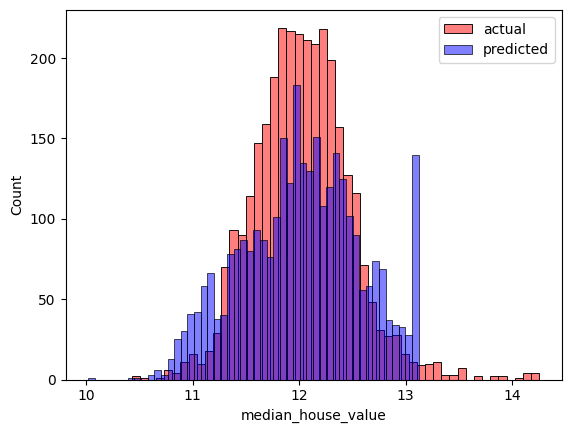

In [25]:
plot_predictions(y_pred, y_test, bins=50);

Compare some price predictions:

In [26]:
for idx in np.random.choice(y_test.index, size=5, replace=False):
    actual = df.loc[idx, 'median_house_value']
    predicted = np.expm1(y_pred[idx])
    print(f'actual=${round(actual, -2):8} predicted=${round(predicted, -2):8} pct_off={predicted/actual - 1:.2%}')

actual=$125900.0 predicted=$130600.0 pct_off=3.69%
actual=$212500.0 predicted=$119100.0 pct_off=-43.96%
actual=$110600.0 predicted=$120800.0 pct_off=9.18%
actual=$107300.0 predicted=$137700.0 pct_off=28.38%
actual=$ 93800.0 predicted=$169900.0 pct_off=81.09%
